<a href="https://colab.research.google.com/github/vard-uhi/statistics-with-python-tasks/blob/main/Hypothesis_testing_with_NHANES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice notebook for hypothesis tests using NHANES data

This notebook will give you the opportunity to perform some hypothesis tests with the NHANES data that are similar to
what was done in the week 3 case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#load the data
from google.colab import files
data_to_load = files.upload()

Saving nhanes_2015_2016.csv to nhanes_2015_2016.csv


In [3]:
import io
# .read_csv() assigns the information from the initial *.csv file to this variable
raw_data = pd.read_csv(io.BytesIO(data_to_load['nhanes_2015_2016.csv']))

In [4]:
df = raw_data.copy()

In [5]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Conduct a hypothesis test (at the 0.05 level) for the null hypothesis that the proportion of women who smoke is equal to the proportion of men who smoke.

In [6]:
male_smoke = df[df['RIAGENDR'] == 1]['SMQ020']
male_smoke = male_smoke[~male_smoke.isna()]
male_smoke.reset_index(inplace=True, drop=True)

female_smoke = df[df['RIAGENDR'] == 2]['SMQ020']
female_smoke = female_smoke[~female_smoke.isna()]
female_smoke.reset_index(inplace=True, drop=True)

In [7]:
print(sum(male_smoke == 1), ",", sum(male_smoke != 1))

1413 , 1346


In [8]:
print(sum(female_smoke ==1 ), ",", sum(female_smoke != 1))

906 , 2070


In [9]:
sum(male_smoke ==1 ) / len(male_smoke)

0.5121420804639362

In [10]:
sum(female_smoke ==1 ) / len(female_smoke)

0.30443548387096775

In [11]:
(np.std(male_smoke)**2) / (np.std(female_smoke)**2)

1.2459917316304396

In [12]:
sm.stats.ttest_ind(male_smoke, female_smoke)

(-13.667880438664463, 7.117170730872684e-42, 5733.0)

__Q1a.__ Write 1-2 sentences explaining the substance of your findings to someone who does not know anything about statistical hypothesis tests.

The proportion of women who smoke is significally different from the proportion of men who smoke. We will reject the null hypothesis.

__Q1b.__ Construct three 95% confidence intervals: one for the proportion of women who smoke, one for the proportion of men who smoke, and one for the difference in the rates of smoking between women and men.

In [13]:
import statsmodels.api as sm

In [14]:
ci_low, ci_upp = sm.stats.proportion_confint(sum(female_smoke == 1), len(female_smoke), alpha=0.05, method='normal')
ci_low, ci_upp

(0.2879026244757051, 0.3209683432662304)

In [15]:
ci_low, ci_upp = sm.stats.proportion_confint(sum(male_smoke==1), len(male_smoke), alpha=0.05, method='normal')
ci_low, ci_upp

(0.49349056386167417, 0.5307935970661982)

In [16]:
proportion_male_smokers = (sum(male_smoke ==1) / len(male_smoke))
proportion_male_smokers

0.5121420804639362

In [17]:
proportion_female_smokers = (sum(female_smoke ==1) / len(female_smoke))
proportion_female_smokers

0.30443548387096775

In [18]:
proportion_smokers_gender_diff = proportion_male_smokers - proportion_female_smokers
proportion_smokers_gender_diff

0.20770659659296842

In [19]:
se_smokers_male = np.sqrt((proportion_male_smokers * (1 - proportion_male_smokers)) / len(male_smoke))
se_smokers_male

0.009516254762527675

In [20]:
se_smokers_female = np.sqrt((proportion_female_smokers * (1 - proportion_female_smokers)) / len(female_smoke))
se_smokers_female

0.008435287344906213

In [21]:
se_proportion_smokers_diff = np.sqrt((se_smokers_male**2) + (se_smokers_female**2))
se_proportion_smokers_diff

0.012716649609722899

In [22]:
print('Lower Boundary Male: ', proportion_smokers_gender_diff - 1.96 * se_proportion_smokers_diff)
print('Upper Boundary Male: ', proportion_smokers_gender_diff + 1.96 * se_proportion_smokers_diff)

Lower Boundary Male:  0.18278196335791153
Upper Boundary Male:  0.2326312298280253


__Q1c.__ Comment on any ways in which the confidence intervals that you found in part b reinforce, contradict, or add support to the hypothesis test conducted in part a.

The confidence intervals support our conclusion that the the proportion of males who smoke is significant from the proportion of females who smoke. The confidence interval for the proportion of males who smoke does not overlap with the proportion of females who smoke.

## Question 2

Partition the population into two groups based on whether a person has graduated college or not, using the educational attainment variable [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2).  Then conduct a test of the null hypothesis that the average heights (in centimeters) of the two groups are equal.  Next, convert the heights from centimeters to inches, and conduct a test of the null hypothesis that the average heights (in inches) of the two groups are equal.

In [23]:
graduated_height_cm = df[df['DMDEDUC2'] ==5]['BMXHT']
graduated_height_cm = graduated_height_cm[~graduated_height_cm.isna()]
graduated_height_cm.reset_index(inplace=True, drop=True)

In [24]:
not_graduated_height_cm = df[df['DMDEDUC2']!=5]['BMXHT']
not_graduated_height_cm = not_graduated_height_cm[~not_graduated_height_cm.isna()]
not_graduated_height_cm.reset_index(inplace=True, drop=True)

In [25]:
len(graduated_height_cm)

1355

In [26]:
len(not_graduated_height_cm)

4318

In [27]:
graduated_height_cm.mean()

167.85535055350562

In [28]:
not_graduated_height_cm.mean()

165.60544233441394

In [29]:
print(sm.stats.ztest(graduated_height_cm, not_graduated_height_cm))

(7.2007656698012505, 5.987537169067422e-13)


In [30]:
graduated_height_inches = graduated_height_cm / 2.54
graduated_height_inches = graduated_height_inches[~graduated_height_inches.isna()]
graduated_height_inches.reset_index(inplace=True, drop=True)

In [31]:
not_graduated_height_inches = not_graduated_height_cm / 2.54
not_graduated_height_inches = not_graduated_height_inches[~not_graduated_height_inches.isna()]
not_graduated_height_inches.reset_index(inplace=True, drop=True)

In [32]:
print(sm.stats.ztest(graduated_height_inches, not_graduated_height_inches))

(7.200765669801254, 5.987537169067249e-13)


__Q2a.__ Based on the analysis performed here, are you confident that people who graduated from college have a different average height compared to people who did not graduate from college?

Yes, we should reject the null hypothesis in favor of the alternative one.

Q2b: How do the results obtained using the heights expressed in inches compare to the results obtained using the heights expressed in centimeters?

The z-statistic and p-values are very similar.

## Question 3

Conduct a hypothesis test of the null hypothesis that the average BMI for men between 30 and 40 is equal to the average BMI for men between 50 and 60.  Then carry out this test again after log transforming the BMI values.

In [33]:
bmi = df[(df['RIDAGEYR'] >= 30) & (df['RIDAGEYR'] <= 40)]
bmi.reset_index(inplace=True, drop=True)

In [35]:
bmi_men = bmi[bmi['RIAGENDR']==1]['BMXBMI']
bmi_men = bmi_men[~bmi_men.isna()]
bmi_men.reset_index(inplace=True, drop=True)

In [37]:
bmi_women = bmi[bmi['RIAGENDR']==2]['BMXBMI']
bmi_women = bmi_women[~bmi_women.isna()]
bmi_women.reset_index(inplace=True, drop=True)

In [38]:
len(bmi_men)

488

In [39]:
len(bmi_women)

525

In [40]:
print(sm.stats.ztest(bmi_men, bmi_women))

(-1.109324496826031, 0.26729022096402777)


log

In [42]:
bmi_men_log = np.log(bmi_men)

In [43]:
bmi_women_log = np.log(bmi_women)

In [44]:
print(sm.stats.ztest(bmi_men_log, bmi_women_log))

(-0.4737991644730396, 0.6356431304660779)


__Q3a.__ How would you characterize the evidence that mean BMI differs between these age bands, and how would you characterize the evidence that mean log BMI differs between these age bands?

In both, the mean BMI does not significally differ between the two genders. The p-value is higher after applying log transform to our values. Therefore, we fail to reject the null hypothesis.

## Question 4

Suppose we wish to compare the mean BMI between college graduates and people who have not graduated from college, focusing on women between the ages of 30 and 40.  First, consider the variance of BMI within each of these subpopulations using graphical techniques, and through the estimated subpopulation variances.  Then, calculate pooled and unpooled estimates of the standard error for the difference between the mean BMI in the two populations being compared.  Finally, test the null hypothesis that the two population means are equal, using each of the two different standard errors.

In [45]:
bmi_female = bmi[bmi['RIAGENDR'] ==2]
bmi_female.reset_index(inplace=True, drop=True)

In [46]:
bmi_female_graduated = bmi_female[bmi_female['DMDEDUC2'] ==5]['BMXBMI']
bmi_female_graduated = bmi_female_graduated[~bmi_female_graduated.isna()]
bmi_female_graduated.reset_index(inplace=True, drop=True)

In [47]:
bmi_female_not_graduated = bmi_female[bmi_female['DMDEDUC2'].isin([1, 2, 3, 4])]['BMXBMI']
bmi_female_not_graduated = bmi_female_not_graduated[~bmi_female_not_graduated.isna()]
bmi_female_not_graduated.reset_index(inplace=True, drop=True)

In [48]:
bmi_female_graduated.describe()

count    171.000000
mean      27.808187
std        7.358264
min       17.100000
25%       22.750000
50%       26.300000
75%       31.150000
max       62.700000
Name: BMXBMI, dtype: float64

In [49]:
bmi_female_not_graduated.describe()

count    354.000000
mean      31.257345
std        8.256083
min       16.600000
25%       25.300000
50%       29.500000
75%       35.875000
max       60.900000
Name: BMXBMI, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


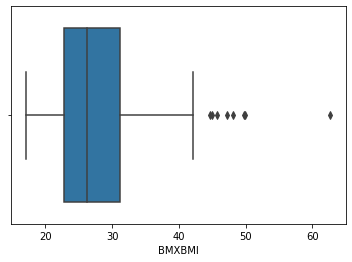

In [51]:
sns.boxplot(bmi_female_graduated)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


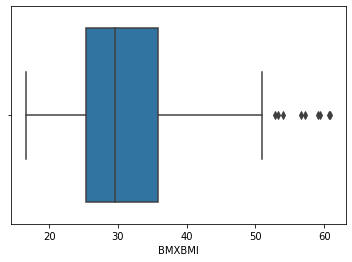

In [52]:
sns.boxplot(bmi_female_not_graduated)

In [53]:
(np.std(bmi_female_graduated)**2) / (np.std(bmi_female_not_graduated)**2)

0.791924918261364

In [54]:
bmi_female_graduated = sm.stats.DescrStatsW(bmi_female_graduated)
bmi_female_not_graduated = sm.stats.DescrStatsW(bmi_female_not_graduated)
print("pooled: ", sm.stats.CompareMeans(bmi_female_graduated, bmi_female_not_graduated).ztest_ind(usevar='pooled'))
print("unequal:", sm.stats.CompareMeans(bmi_female_graduated, bmi_female_not_graduated).ztest_ind(usevar='unequal'))

pooled:  (-4.643908450956424, 3.4187910067116893e-06)
unequal: (-4.833662355599101, 1.340438616920389e-06)


__Q4a.__ Comment on the strength of evidence against the null hypothesis that these two populations have equal mean BMI.

The two populations don't have an equal BMI and we will reject the null hypothesis since the p-value is really small and below our significant level for the alternative hypothesis.

__Q4b.__ Comment on the degree to which the two populations have different variances, and on the extent to which the results using different approaches to estimating the standard error of the mean difference give divergent results.

The variance difference between the two populations is not that huge therefore, the two approaches result in very close values and we reach the same conclusion.

## Question 5

Conduct a test of the null hypothesis that the first and second diastolic blood pressure measurements within a subject have the same mean values.

In [55]:
dx = df[["BPXDI1", "BPXDI2"]].dropna()
db = dx.BPXDI1 - dx.BPXDI2
print(db.mean())
sm.stats.ztest(db)

0.3490407897187558


(4.140387087476751, 3.467202439743513e-05)

__Q5a.__ Briefly describe your findings for an audience that is not familiar with statistical hypothesis testing.

The first diastolic blood pressure is significally different from the second diastolic blood pressure.

__Q5b.__ Pretend that the first and second diastolic blood pressure measurements were taken on different people.  Modfify the analysis above as appropriate for this setting.

In [56]:
BPXDI1 = df[~df['BPXDI1'].isna()]['BPXDI1']
BPXDI1.reset_index(inplace=True, drop=True)
BPXDI2 = df[~df['BPXDI2'].isna()]['BPXDI2']
BPXDI2.reset_index(inplace=True, drop=True)

In [57]:
BPXDI1 = sm.stats.DescrStatsW(BPXDI1)
BPXDI2 = sm.stats.DescrStatsW(BPXDI2)
print(sm.stats.CompareMeans(BPXDI1, BPXDI2).ztest_ind(usevar='pooled'))

(0.6848982193746493, 0.49340814971248503)


__Q5c.__ Briefly describe how the approaches used and the results obtained in the preceeding two parts of the question differ.

When we have the two measurments as unpaired we failed to reject the null hypothesis. However, when two measurments are paired, we rejected the null hypothesis as the p-value was below our significance leve.